# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Неоконченное высшее', 'Высшее', 'Неполное среднее'}


MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{'Государственная служба', nan, 'Строительство', 'Недвижимость', 'Сборочные производства', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Туризм', 'Информационные технологии', 'Страхование', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Нефтегазовая промышленность', 'Управляющая компания', 'Подбор персонала', 'ЧОП/Детективная д-ть', 'Сельское хозяйство', 'Логистика', 'Коммунальное хоз-во/Дорожные службы', 'Торговля', 'Развлечения/Искусство', 'Банк/Финансы', 'Другие сферы', 'Транспорт', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'Здравоохранение', 'Образование'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

#### Ответ

Выполнив df.info () узнаем, в каких колонках пропущенные данные. 
Далее, для принятия решения, что делать с данными, в которых есть пропуски, классифицируем столбцы по важности и количеству строк, по которым данные пропущены.

ПОЛЕ - ОПИСАНИЕ - КОЛ_ВО ЗАПОЛНЕНЫХ СТРОК - ТИП ДАННЫХ - ВАЖНОСТЬ

GEN_INDUSTRY - отрасль работы клиента - 27420 - object - Важно

GEN_TITLE - должность - 27420 - object - Важно

ORG_TP_STATE - форма собственности компании - object - Важность под вопросом

ORG_TP_FCAPITAL - отношение к иностранному капиталу - object - Важность под вопросом

JOB_DIR - направление деятельности внутри компании - object - Важность под вопросом

TP_PROVINCE - область торговой точки, где клиент брал последний кредит - object - Не важно

WORK_TIME - время работы на текущем месте (в месяцах) - 27416 - float64 - Важно

PREVIOUS_CARD_NUM_UTILIZED - количество уже утилизированных карт - 600 - float64 - Важность под вопросом. (Но исходя из условия, что если пусто, значит = 0, то все Nan надо переконвертировать в 0. В таком случае в данном столбце пропусков не будет)

Выбор важности данных зависит от требований ТЗ или решения аналитика. Т.к. четкого ТЗ нет, то принимаем решение, что  ORG_TP_STATE, ORG_TP_FCAPITAL,  JOB_DIR, TP_PROVINCE не имеют прямой связи с потенциальным клиентом и данные колонки в последствии удалим.
df = df.drop(['ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'PREVIOUS_CARD_NUM_UTILIZED'], axis=1)

PREVIOUS_CARD_NUM_UTILIZED заменим Nan на "0"
df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True)

GEN_INDUSTRY, GEN_TITLE - Важные атрибуты для предсказания и количество строк, по которым данные заполнены около 91%, то по этим колонкам удалим строки с пустыми данными
df = df[~df['GEN_INDUSTRY'].isnull()]
df = df[~df['GEN_TITLE'].isnull()]

WORK_TIME также достаточно важный параметр, но так как он имеет тип float64 попробуем заполнить медианой объектов.
df.loc[df['WORK_TIME'].isnull(), 'WORK_TIME'] = df['WORK_TIME'].median()
 При более детальном анализе можно было бы выбрать свойство (или набор свойств), по которым считать медиану, т.е. брать медиану для конкретной отрасли.


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки, это признаки, значения которых определяют факт принадлежности к какой-то категории, т.е. столбцы типа object, которые несут полезную для анализа информацию, которые надо сконвертировать в числовые значения(“0”, “1”).
Выполнив df.info() видим, что у нас есть следующие столбцы с категориальными признаками:

EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_PROVINCE         30133 non-null object
POSTAL_ADDRESS_PROVINCE       30133 non-null object
TP_PROVINCE                   29543 non-null object
REGION_NM                     30131 non-null object

Оценив данные, примем решение и удалим те столбцы, которые не нужны для дальнейшего анализа:

Оставляем и выполняем One Hot Encoding: 

EDUCATION                     
MARITAL_STATUS                
GEN_INDUSTRY                  
GEN_TITLE                     
FAMILY_INCOME                 

Удаляем:

ORG_TP_STATE                  
ORG_TP_FCAPITAL               
JOB_DIR                      
REG_ADDRESS_PROVINCE          
FACT_ADDRESS_PROVINCE         
POSTAL_ADDRESS_PROVINCE       
TP_PROVINCE                   
REGION_NM                     


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [15]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    #Удаляляем идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    #Избавляемся от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # Решаем проблему с пропусками:
    
    #          Удаляя строки с пустыми значениями
    df_output = df_output[~df_output['GEN_INDUSTRY'].isnull()]
    df_output = df_output[~df_output['GEN_TITLE'].isnull()]

    #          Назначая медиану, тем значениям которые пустые (т.к. пустых значений минимум, то возможно применение данной операции)
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].median()
    
    #          Заполняя значения NaN нулями, что следует из условия (количество уже утилизированных карт ( если пусто - 0))
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0).astype(int)
    
    #          Удаляя несущественные для предсказания столбцы (такое решение принято на этапе анализа исходных данных)
    df_output = df_output.drop(['ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL'], axis=1)
    
    # Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS','GEN_INDUSTRY', 'GEN_TITLE', 'FAMILY_INCOME'])
    
          
    return df_output

In [16]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [17]:
X=df_train_preproc.drop('TARGET', axis=1) # МАТРИЦА ПРИЗНАКОВ ДАННЫХ ДЛЯ ОБУЧЕНИЯ. Удаляем таргет из фичей объектов, на которых проходим обучение
X_test=df_test_preproc.drop('TARGET', axis=1) # МАТРИЦА ПРИЗНАКОВ ДАННЫХ ДЛЯ ТЕСТИРОВАНИЯ. Удаляем таргет из фичей объектов, на которых будем проводить тестирование
y = df_train_preproc['TARGET'] # ЦЕЛЕВАЯ ПЕРЕМЕННАЯ ОБУЧЕНИЯ. Выделяем таргет для объектов, на которых проводим обучение
y_test = df_test_preproc['TARGET'] # ЦЕЛЕВАЯ ПЕРЕМЕННАЯ ТЕСТИРОВАНИЯ. Выделяем таргет для объектов, на которых будем проводить тестирование

#### Задание 5. Обучение и оценка качества разных моделей

In [18]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test_test, y_train, y_test_test = train_test_split(X, y, test_size=0.3, random_state=42)
#       Инициализируем следующие переменные:
# X_train - данные об объектах, попавших в выборку, на которых проходит обучение
# X_test_test - данные об объектах, на которых проводится тестирование
# y_train - таргеты данных, на которых проходит обучение (известные системе)
# y_test_test - предсказанные системой таргеты (значение которых система не знала заранее)

# В train_test_split передаем матрицу и вектор набора данных, подготовленных для обучения.
# Для окончательного тестирования нашей модели обучения остается набор данных, которые система
# на этапе обучения не видит: X_test и y_test

In [19]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

modelLR = LogisticRegression() # инициализируем "черный ящик" LogisticRegression
modelLR.fit(X_train, y_train) # обучаем модель на Training-данных
predictLR = modelLR.predict(X_test_test) # делаем предсказание на Test-данных
predict_probaLR = modelLR.predict_proba(X_test_test) # делаем предсказание вероятностей на Test-данных

modelRFC = RandomForestClassifier() # инициализируем "черный ящик" RandomForestClassifier
modelRFC.fit(X_train, y_train) # обучаем модель на Training-данных
predictRFC = modelRFC.predict(X_test_test) # делаем предсказание на Test-данных
predict_probaRFC = modelRFC.predict_proba(X_test_test) # делаем предсказание вероятностей на Test-данных

modelDTC = DecisionTreeClassifier() # инициализируем "черный ящик" DecisionTreeClassifier
modelDTC.fit(X_train, y_train) # обучаем модель на Training-данных
predictDTC = modelDTC.predict(X_test_test) # делаем предсказание на Test-данных
predict_probaDTC = modelDTC.predict_proba(X_test_test) # делаем предсказание вероятностей на Test-данных

In [20]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
accuracyLR = accuracy_score(y_test_test, predictLR) # Accuracy для LogisticRegression
accuracyRFC = accuracy_score(y_test_test, predictRFC) # Accuracy для RandomForestClassifier
accuracyDTC = accuracy_score(y_test_test, predictDTC) # Accuracy для DecisionTreeClassifier

precisionLR = precision_score(y_test_test, predictLR) # Precision для LogisticRegression
precisionRFC = precision_score(y_test_test, predictRFC) # Precision для RandomForestClassifier
precisionDTC = precision_score(y_test_test, predictDTC) # Precision для DecisionTreeClassifier

recallLR = recall_score(y_test_test, predictLR) # Recall для LogisticRegression
recallRFC = recall_score(y_test_test, predictRFC) # Recall для RandomForestClassifier
recallDTC = recall_score(y_test_test, predictDTC) # Recall для DecisionTreeClassifier

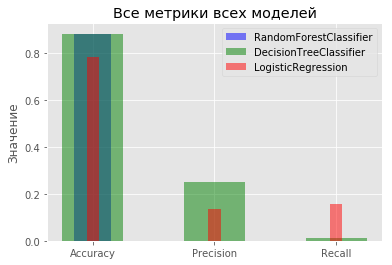

In [21]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here,

objects = ('Accuracy', 'Precision', 'Recall')
y_pos = np.arange(len(objects))
performanceLR = [accuracyLR,precisionLR,recallLR]
performanceRFC = [accuracyRFC,precisionRFC,recallRFC]
performanceDTC = [accuracyDTC,precisionDTC,recallDTC]


plt.bar(y_pos, performanceLR,width=0.3, align='center', alpha=0.5, label='RandomForestClassifier', color = 'blue')
plt.bar(y_pos, performanceRFC,width=0.5, align='center', alpha=0.5, label='DecisionTreeClassifier', color = 'green')
plt.bar(y_pos, performanceDTC,width=0.1, align='center', alpha=0.5, label='LogisticRegression', color = 'red')

plt.xticks(y_pos, objects)
plt.ylabel('Значение')
plt.title('Все метрики всех моделей')
plt.legend() 
plt.show()

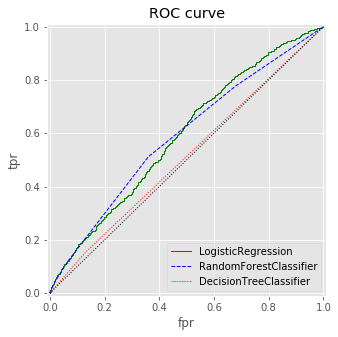

In [22]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve
fprLR, tprLR, thresholdsLR = roc_curve(y_test_test, predict_probaLR[:,1]) 
fprRFC, tprRFC, thresholdsRFC = roc_curve(y_test_test, predict_probaRFC[:,1]) 
fprDTC, tprDTC, thresholdsDTC = roc_curve(y_test_test, predict_probaDTC[:,1]) 

plt.figure(figsize=(5, 5))

plt.plot(fprLR, tprLR, label=r"LogisticRegression",color='g', linestyle='solid',
        linewidth=1, markersize=4)
plt.plot(fprRFC, tprRFC, label=r"RandomForestClassifier",color='b', linestyle='dashed',
        linewidth=1, markersize=4)
plt.plot(fprDTC, tprDTC, label=r"DecisionTreeClassifier",color='r', linestyle='dotted',
        linewidth=1, markersize=4)

plt.plot([0, 1], [0, 1],color='black', linestyle='dotted',
        linewidth=1, markersize=4)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend(loc=4);

In [23]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
lr = LogisticRegression() # инициализация модели
ROC_AUC_LR =cross_val_score(
    lr, # передаем модель на которой будет строится предсказания
    X_train, # передача датафрейма
    y_train, # передача таргета
    scoring='roc_auc', # передача скоринга, который используем
    cv=10 # на сколько частей делим
)

rfc = RandomForestClassifier() # инициализация модели
ROC_AUC_RFC =cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

dtc = DecisionTreeClassifier() # инициализация модели
ROC_AUC_DTC =cross_val_score(
    dtc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

import statistics
ROC_AUC_LR_mean = statistics.mean(ROC_AUC_LR)
ROC_AUC_RFC_mean = statistics.mean(ROC_AUC_RFC)
ROC_AUC_DTC_mean = statistics.mean(ROC_AUC_DTC)
print ("Средний roc_auc для модели Logistic Regression = {:.3f}".format (ROC_AUC_LR_mean))
print ("Средний roc_auc для модели Random Forest Classifier = {:.3f}".format (statistics.mean(ROC_AUC_RFC)))
print ("Средний roc_auc для модели Decision Tree Classifier = {:.3f}".format (statistics.mean(ROC_AUC_DTC)))


Средний roc_auc для модели Logistic Regression = 0.618
Средний roc_auc для модели Random Forest Classifier = 0.582
Средний roc_auc для модели Decision Tree Classifier = 0.528


In [24]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
predict = modelLR.predict_proba(X_test) #выбрав лучшую модель, берем матрицу, оставленную для тестирования

         fpr       tpr  thresholds
0   0.000000  0.000000    2.000000
1   0.000084  0.000000    1.000000
2   0.000844  0.000000    0.474556
3   0.000844  0.001166    0.461413
4   0.000928  0.001166    0.452843
5   0.000928  0.001748    0.448041
6   0.001350  0.001748    0.426772
7   0.001350  0.002331    0.420773
8   0.001604  0.002331    0.416242
9   0.001604  0.002914    0.416140
10  0.001772  0.002914    0.410508
11  0.001772  0.003497    0.410438
12  0.002363  0.003497    0.393051
13  0.002363  0.004662    0.390703
14  0.002701  0.004662    0.384079
15  0.002701  0.005245    0.382712
16  0.002870  0.005245    0.378082
17  0.002870  0.005828    0.377789
18  0.002954  0.005828    0.375913
19  0.002954  0.006410    0.375024
20  0.003123  0.006410    0.370546
21  0.003123  0.006993    0.367565
22  0.003207  0.006993    0.366501
23  0.003207  0.007576    0.366319
24  0.003883  0.007576    0.359068
25  0.003883  0.008159    0.357978
26  0.004051  0.008159    0.354762
27  0.004051  0.0087

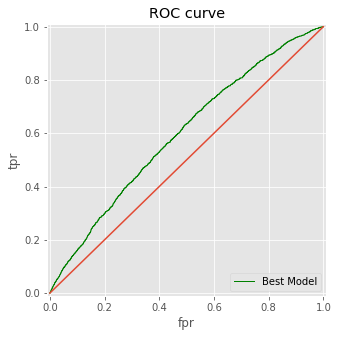

In [25]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

fpr, tpr, thresholds = roc_curve(y_test, predict[:,1]) 

roc_curve_data = pd.DataFrame(
    {'fpr': fpr,
     'tpr': tpr,
     'thresholds': thresholds
    })

print (roc_curve_data.head(50))

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label=r"Best Model",color='g', linestyle='solid',
        linewidth=1, markersize=4)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc=4);

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

В своем задании я удалил свойства, значениями которых я посчитал, что можно пренебречь. В дополнительной работе я выполнил перерасчет со всеми столбцами выполняя One Hot Encoding. В результате получил предсказания, которые практически не отличаются от тех, которые я получил в предыдущем тесте.



### В связи с этим у меня возник вопрос: Можно ли задавать фичам вес и каким-то автоматическим способом выяснить влияние конкретного свойства на предсказание?
Спасибо за ответ.

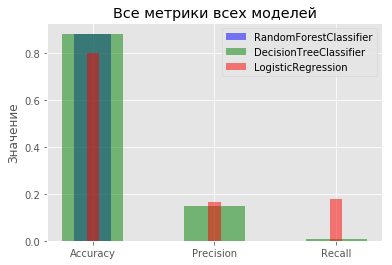

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)


def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    #Избавляемся от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    # Решаем проблему с пропусками:
    #          Удаляя строки с пустыми значениями
    df_output = df_output[~df_output['GEN_INDUSTRY'].isnull()]
    df_output = df_output[~df_output['GEN_TITLE'].isnull()]
    #          Назначая медиану, тем значениям которые пустые (т.к. пустых значений минимум, то возможно применение данной операции)
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].median()
    #          Заполняя значения NaN нулями, что следует из условия (количество уже утилизированных карт ( если пусто - 0))
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0).astype(int)
    # Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS','GEN_INDUSTRY', 'GEN_TITLE', 'FAMILY_INCOME', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL'])
    return df_output

df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)
X=df_train_preproc.drop('TARGET', axis=1) # МАТРИЦА ПРИЗНАКОВ ДАННЫХ ДЛЯ ОБУЧЕНИЯ. Удаляем таргет из фичей объектов, на которых проходим обучение
X_test=df_test_preproc.drop('TARGET', axis=1) # МАТРИЦА ПРИЗНАКОВ ДАННЫХ ДЛЯ ТЕСТИРОВАНИЯ. Удаляем таргет из фичей объектов, на которых будем проводить тестирование
y = df_train_preproc['TARGET'] # ЦЕЛЕВАЯ ПЕРЕМЕННАЯ ОБУЧЕНИЯ. Выделяем таргет для объектов, на которых проводим обучение
y_test = df_test_preproc['TARGET'] # ЦЕЛЕВАЯ ПЕРЕМЕННАЯ ТЕСТИРОВАНИЯ. Выделяем таргет для объектов, на которых будем проводить тестирование
from sklearn.model_selection import train_test_split
X_train, X_test_test, y_train, y_test_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression() # инициализируем "черный ящик" LogisticRegression
modelLR.fit(X_train, y_train) # обучаем модель на Training-данных
predictLR = modelLR.predict(X_test_test) # делаем предсказание на Test-данных
predict_probaLR = modelLR.predict_proba(X_test_test) # делаем предсказание вероятностей на Test-данных

modelRFC = RandomForestClassifier() # инициализируем "черный ящик" RandomForestClassifier
modelRFC.fit(X_train, y_train) # обучаем модель на Training-данных
predictRFC = modelRFC.predict(X_test_test) # делаем предсказание на Test-данных
predict_probaRFC = modelRFC.predict_proba(X_test_test) # делаем предсказание вероятностей на Test-данных

modelDTC = DecisionTreeClassifier() # инициализируем "черный ящик" DecisionTreeClassifier
modelDTC.fit(X_train, y_train) # обучаем модель на Training-данных
predictDTC = modelDTC.predict(X_test_test) # делаем предсказание на Test-данных
predict_probaDTC = modelDTC.predict_proba(X_test_test) # делаем предсказание вероятностей на Test-данных
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracyLR = accuracy_score(y_test_test, predictLR) # Accuracy для LogisticRegression
accuracyRFC = accuracy_score(y_test_test, predictRFC) # Accuracy для RandomForestClassifier
accuracyDTC = accuracy_score(y_test_test, predictDTC) # Accuracy для DecisionTreeClassifier

precisionLR = precision_score(y_test_test, predictLR) # Precision для LogisticRegression
precisionRFC = precision_score(y_test_test, predictRFC) # Precision для RandomForestClassifier
precisionDTC = precision_score(y_test_test, predictDTC) # Precision для DecisionTreeClassifier

recallLR = recall_score(y_test_test, predictLR) # Recall для LogisticRegression
recallRFC = recall_score(y_test_test, predictRFC) # Recall для RandomForestClassifier
recallDTC = recall_score(y_test_test, predictDTC) # Recall для DecisionTreeClassifier
objects = ('Accuracy', 'Precision', 'Recall')
y_pos = np.arange(len(objects))
performanceLR = [accuracyLR,precisionLR,recallLR]
performanceRFC = [accuracyRFC,precisionRFC,recallRFC]
performanceDTC = [accuracyDTC,precisionDTC,recallDTC]


plt.bar(y_pos, performanceLR,width=0.3, align='center', alpha=0.5, label='RandomForestClassifier', color = 'blue')
plt.bar(y_pos, performanceRFC,width=0.5, align='center', alpha=0.5, label='DecisionTreeClassifier', color = 'green')
plt.bar(y_pos, performanceDTC,width=0.1, align='center', alpha=0.5, label='LogisticRegression', color = 'red')

plt.xticks(y_pos, objects)
plt.ylabel('Значение')
plt.title('Все метрики всех моделей')
plt.legend() 
plt.show()

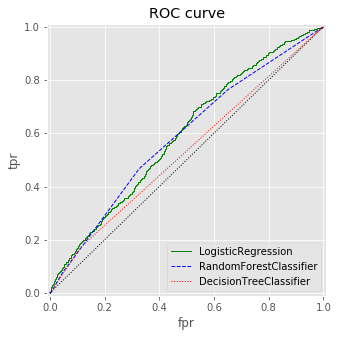

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve
fprLR, tprLR, thresholdsLR = roc_curve(y_test_test, predict_probaLR[:,1]) 
fprRFC, tprRFC, thresholdsRFC = roc_curve(y_test_test, predict_probaRFC[:,1]) 
fprDTC, tprDTC, thresholdsDTC = roc_curve(y_test_test, predict_probaDTC[:,1]) 

plt.figure(figsize=(5, 5))

plt.plot(fprLR, tprLR, label=r"LogisticRegression",color='g', linestyle='solid',
        linewidth=1, markersize=4)
plt.plot(fprRFC, tprRFC, label=r"RandomForestClassifier",color='b', linestyle='dashed',
        linewidth=1, markersize=4)
plt.plot(fprDTC, tprDTC, label=r"DecisionTreeClassifier",color='r', linestyle='dotted',
        linewidth=1, markersize=4)

plt.plot([0, 1], [0, 1],color='black', linestyle='dotted',
        linewidth=1, markersize=4)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend(loc=4);

In [28]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression() # инициализация модели
ROC_AUC_LR =cross_val_score(
    lr, # передаем модель на которой будет строится предсказания
    X_train, # передача датафрейма
    y_train, # передача таргета
    scoring='roc_auc', # передача скоринга, который используем
    cv=10 # на сколько частей делим
)

rfc = RandomForestClassifier() # инициализация модели
ROC_AUC_RFC =cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

dtc = DecisionTreeClassifier() # инициализация модели
ROC_AUC_DTC =cross_val_score(
    dtc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

import statistics
ROC_AUC_LR_mean = statistics.mean(ROC_AUC_LR)
ROC_AUC_RFC_mean = statistics.mean(ROC_AUC_RFC)
ROC_AUC_DTC_mean = statistics.mean(ROC_AUC_DTC)
print ("Средний roc_auc для модели Logistic Regression = {:.3f}".format (ROC_AUC_LR_mean))
print ("Средний roc_auc для модели Random Forest Classifier = {:.3f}".format (statistics.mean(ROC_AUC_RFC)))
print ("Средний roc_auc для модели Decision Tree Classifier = {:.3f}".format (statistics.mean(ROC_AUC_DTC)))


Средний roc_auc для модели Logistic Regression = 0.615
Средний roc_auc для модели Random Forest Classifier = 0.590
Средний roc_auc для модели Decision Tree Classifier = 0.526


         fpr       tpr  thresholds
0   0.000000  0.000000    2.000000
1   0.000084  0.000000    1.000000
2   0.000844  0.000000    0.475846
3   0.000844  0.001166    0.463163
4   0.000928  0.001166    0.454787
5   0.000928  0.002331    0.439424
6   0.001519  0.002331    0.420185
7   0.001519  0.002914    0.419470
8   0.001688  0.002914    0.415548
9   0.001688  0.003497    0.411983
10  0.002448  0.003497    0.394965
11  0.002448  0.004662    0.390489
12  0.002701  0.004662    0.386133
13  0.002701  0.005245    0.385211
14  0.002785  0.005245    0.382768
15  0.002785  0.005828    0.382408
16  0.002954  0.005828    0.375087
17  0.002954  0.006993    0.373602
18  0.003376  0.006993    0.365163
19  0.003376  0.007576    0.364848
20  0.003798  0.007576    0.360911
21  0.003798  0.008159    0.358622
22  0.003883  0.008159    0.356678
23  0.003883  0.008741    0.354979
24  0.004811  0.008741    0.346175
25  0.004811  0.009324    0.346136
26  0.004895  0.009324    0.344636
27  0.004895  0.0104

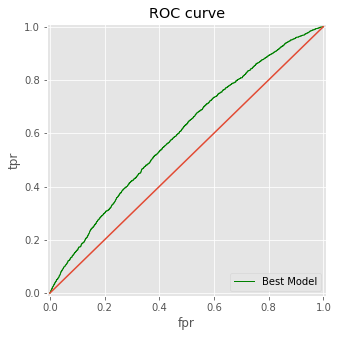

In [29]:
predict = modelLR.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1]) 

roc_curve_data = pd.DataFrame(
    {'fpr': fpr,
     'tpr': tpr,
     'thresholds': thresholds
    })

print (roc_curve_data.head(50))

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label=r"Best Model",color='g', linestyle='solid',
        linewidth=1, markersize=4)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc=4);